# Sobel边缘检测

In [1]:
import numpy as np
import cupy as cp
import cv2
import string
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [3]:
def load_kernel(src,kname):
    _ = cp.zeros((1,)) # 初始化cuda context
    kernel = cp.core.core.compile_with_cache(src).get_function(kname)
    return kernel
def load_kernel_file(fname,kname):
    sources = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read()
    kernel = load_kernel(sources,kname)
    return kernel

In [8]:
sobel = load_kernel_file('../../datas/cuda/sobel.cu','sobel')
guassian = load_kernel_file('../../datas/cuda/gaussian_blur.cu','gaussian_blur')

In [5]:
src = cv2.imread('../../datas/f2.jpg',0)

In [9]:
height,width = src.shape
dim_block = (32,32)
grid = ((dim_block[0] + width - 1) // dim_block[0],
        (dim_block[1] + height - 1) // dim_block[1])
src_cu = cp.asarray(src).astype(cp.float32)
gaussian_cu = cp.zeros(src.shape,dtype=cp.float32)
dst_cu = cp.zeros(src.shape,dtype=cp.float32)
kernel = cp.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]
]).astype(cp.float32)

In [10]:
guassian(grid=grid,block=dim_block,args=(src_cu,gaussian_cu,height,width,kernel,3))
sobel(grid=grid,block=dim_block,args=(gaussian_cu,dst_cu,height,width))

In [11]:
dst = dst_cu.get()
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = np.uint8(np.abs(dst))

([], <a list of 0 Text yticklabel objects>)

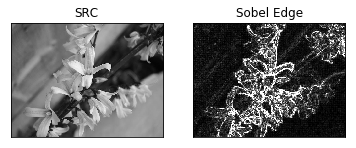

In [12]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Sobel Edge')
plt.xticks([])
plt.yticks([])